### This is the third iteration

Here we will augument the dataset with surface value

In [22]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
           # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline
import os

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins
from folium.plugins import MarkerCluster
from folium import plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import timeit

from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample

from xgboost import XGBRegressor

#Model interpretation modules
import eli5
import lime
import lime.lime_tabular
import shap
shap.initjs()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [23]:
# saving the dataset for later use

pd.set_option('display.max_columns', 500)
df_airbnb = pd.read_csv('../Data/first_iter_poi.csv')

In [24]:
df_airbnb.fillna({'Name':'','Security Deposit':0, 'Cleaning Fee':0, 'Host Response Rate':0, 'Amenities':'',
               'Reviews per Month':0, 'Review Scores Rating':0, 'Review Scores Accuracy':0,
               'Review Scores Cleanliness':0, 'Review Scores Checkin':0, 'Review Scores Communication':0,
               'Review Scores Location':0, 'Review Scores Value':0, 'Host Total Listings Count': 1, 'Bathrooms': 1,
               'Bedrooms':0, 'Beds': 1, 'Host Response Time': 'not specified'}, inplace=True)

### Start sqft size computing

Square feet / size of listing type: Apartment / full home and private room

- average size of room in new york is 40 sqr 
- average size of apartment is 800 sqr 
- average size of loft is 1900 sqr

On Airbnb a house, townhouse, guesthouse, bread & breakfast, suite, Condominium and even hostel are synonymous.
Therefore they are given the same square feets as apartments

In [25]:
df_airbnb.head(1)

Unnamed: 0      ID                                 Name   Latitude  \
0           0  633276  Jacuzzi Suite, minutes to Times Sq.  40.746086   

   Longitude  Price  Security Deposit  Cleaning Fee  Host Response Rate  \
0 -73.946906  108.0             400.0          49.0               100.0   

   Host Total Listings Count Neighbourhood Cleansed  \
0                        2.0       Long Island City   

  Neighbourhood Group Cleansed Property Type  Accommodates  Bathrooms  \
0                       Queens         House           2.0        1.0   

   Bedrooms  Beds                                          Amenities  \
0       1.0   1.0  TV,Internet,Wireless Internet,Air conditioning...   

   Number of Reviews  Reviews per Month  rt_Entire home/apt  rt_Private room  \
0               89.0               1.58                   0                1   

   rt_Shared room  bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  \
0               0         0            0             0          1   

   bg_Staten Island  crime  income  h_a few days or more  h_not specified  \
0                 0   38.6   46829                     0                0   

   h_within a day  h_within a few hours  h_within an hour     Score  
0               0                     1                 0  0.948571

In [26]:
#Function to find which properties and room types match together and then applying average sqr feet

#https://www.airbnb.com/help/article/317/what-do-the-different-home-types-mean
#Airbnb listings are categorized into the following home types:

#Entire place: Guests have the whole place to themselves. This usually includes a bedroom, a bathroom, and a kitchen. 
#Hosts should note in the description if they'll be on the property (ex: "Host occupies first floor of the home")

#Private room: Guests have their own private room for sleeping. Other areas could be shared.
#Shared room: Guests sleep in a bedroom or a common area that could be shared with others.

def label_average_sqr (row):
    if row['Property Type'] == 'House' and row['rt_Private room'] == 1 :
        return 40
    if row['Property Type'] == 'House' and row['rt_Entire home/apt'] == 1 : 
        return 800
    if row['Property Type'] == 'House' and row['rt_Shared room'] == 1 :
        return 45
    if row['Property Type'] == 'Apartment' and row['rt_Private room'] == 1:
        return 40
    if row['Property Type'] == 'Apartment' and row['rt_Entire home/apt'] == 1 :
        return 800
    if row['Property Type'] == 'Apartment' and row['rt_Shared room'] == 1 :
        return 45
    if row['Property Type'] == 'Loft' and row['rt_Private room'] == 1 :
        return 500
    if row['Property Type'] == 'Loft' and row['rt_Entire home/apt'] == 1  :
        return 1900
    if row['Property Type'] == 'Loft' and row['rt_Shared room'] == 1 :
        return 600
    if row['Property Type'] == 'Townhouse' and row['rt_Private room'] == 1 : 
        return 40
    if row['Property Type'] == 'Townhouse' and row['rt_Entire home/apt'] == 1  : 
        return 800
    if row['Property Type'] == 'Townhouse' and row['rt_Shared room'] == 1 : 
        return 45
    if row['Property Type'] == 'Bed & Breakfast' and row['rt_Private room'] == 1 : 
        return 40
    if row['Property Type'] == 'Bed & Breakfast' and row['rt_Entire home/apt'] == 1 : 
        return 600
    if row['Property Type'] == 'Bed & Breakfast' and row['rt_Shared room'] == 1 : 
        return 200
    if row['Property Type'] == 'Dorm' and row['rt_Private room'] == 1 : 
        return 250
    if row['Property Type'] == 'Dorm' and row['rt_Shared room'] == 1 : 
        return 250
    if row['Property Type'] == 'Guesthouse' and row['rt_Private room'] == 1 :
        return 40
    if row['Property Type'] == 'Guesthouse' and row['rt_Entire home/apt'] == 1  : 
        return 800
    if row['Property Type'] == 'Guesthouse' and row['rt_Shared room'] == 1 :
        return 45
    if row['Property Type'] == 'Hostel' and row['rt_Private room'] == 1 :
        return 30
    if row['Property Type'] == 'Hostel' and row['rt_Entire home/apt'] == 1  : 
        return 500
    if row['Property Type'] == 'Hostel' and row['rt_Shared room'] == 1 :
        return 40
    if row['Property Type'] == 'Guest suite' and row['rt_Private room'] == 1 :
        return 40
    if row['Property Type'] == 'Guest suite' and row['rt_Entire home/apt'] == 1  : 
        return 800
    if row['Property Type'] == 'Guest suite' and row['rt_Shared room'] == 1 :
        return 45
    if row['Property Type'] == 'Condominium' and row['rt_Private room'] == 1 :
        return 40
    if row['Property Type'] == 'Condominium' and row['rt_Entire home/apt'] == 1  : 
        return 800
    if row['Property Type'] == 'Condominium' and row['rt_Shared room'] == 1 :
        return 45
    if row['Property Type'] == 'Other' and row['rt_Private room'] == 1 :
        return 40
    if row['Property Type'] == 'Other' and row['rt_Entire home/apt'] == 1  : 
        return 800
    if row['Property Type'] == 'Other' and row['rt_Shared room'] == 1 :
        return 45
    if row['Property Type'] == 'Villa' and row['rt_Private room'] == 1 :
        return 50
    if row['Property Type'] == 'Villa' and row['rt_Entire home/apt'] == 1  : 
        return 900
    if row['Property Type'] == 'Villa' and row['rt_Shared room'] == 1 :
        return 50
    if row['Property Type'] == 'Serviced apartment' and row['rt_Private room'] == 1 :
        return 40
    if row['Property Type'] == 'Serviced apartment' and row['rt_Entire home/apt'] == 1  : 
        return 800
    if row['Property Type'] == 'Serviced apartment' and row['rt_Shared room'] == 1 :
        return 45
    if row['Property Type'] == 'Timeshare' and row['rt_Private room'] == 1 :
        return 30
    if row['Property Type'] == 'Timeshare' and row['rt_Entire home/apt'] == 1  : 
        return 600
    if row['Property Type'] == 'Timeshare' and row['rt_Shared room'] == 1 :
        return 35
    if row['Property Type'] == 'Bungalow' and row['rt_Private room'] == 1 :
        return 30
    if row['Property Type'] == 'Bungalow' and row['rt_Entire home/apt'] == 1  : 
        return 600
    if row['Property Type'] == 'Bungalow' and row['rt_Shared room'] == 1 :
        return 35
    if row['Property Type'] == 'Butique hotel' and row['rt_Private room'] == 1 :
        return 50
    if row['Property Type'] == 'Butique hotel' and row['rt_Entire home/apt'] == 1  : 
        return 900
    if row['Property Type'] == 'Butique hotel' and row['rt_Shared room'] == 1 :
        return 100
    else:
        return 150

    
    
    
    
    
    
    
    
    
    

In [27]:
#Appending to new dataset
df_airbnb['Average sqft'] = df_airbnb.apply (lambda row: label_average_sqr(row), axis=1)

In [28]:
df_airbnb.head(2)

Unnamed: 0        ID                                               Name  \
0           0    633276                Jacuzzi Suite, minutes to Times Sq.   
1           1  17285980  Private 1br in quiet Long Island City neighbor...   

    Latitude  Longitude  Price  Security Deposit  Cleaning Fee  \
0  40.746086 -73.946906  108.0             400.0          49.0   
1  40.734965 -73.935211   80.0             300.0          15.0   

   Host Response Rate  Host Total Listings Count Neighbourhood Cleansed  \
0               100.0                        2.0       Long Island City   
1                80.0                        1.0       Long Island City   

  Neighbourhood Group Cleansed Property Type  Accommodates  Bathrooms  \
0                       Queens         House           2.0        1.0   
1                       Queens     Apartment           3.0        1.0   

   Bedrooms  Beds                                          Amenities  \
0       1.0   1.0  TV,Internet,Wireless Internet,Air conditioning...   
1       1.0   1.0  Wireless Internet,Air conditioning,Kitchen,Hea...   

   Number of Reviews  Reviews per Month  rt_Entire home/apt  rt_Private room  \
0               89.0               1.58                   0                1   
1                1.0               0.38                   1                0   

   rt_Shared room  bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  \
0               0         0            0             0          1   
1               0         0            0             0          1   

   bg_Staten Island  crime  income  h_a few days or more  h_not specified  \
0                 0   38.6   46829                     0                0   
1                 0   38.6   46829                     0                0   

   h_within a day  h_within a few hours  h_within an hour     Score  \
0               0                     1                 0  0.948571   
1               1                     0                 0  0.000000   

   Average sqft  
0            40  
1           800

### Start with Natural Language Processing

In [29]:
# imports
import nltk

import nltk.corpus

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LarsP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LarsP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LarsP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\LarsP\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LarsP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [30]:
# Set the language of the library to english
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 

In [31]:
# By looking at the Airbnb website, we have divided the amenities into three categories: Common, Perks and Luxury. 
# The reason behind that is because some are almost a given when booking a listing and others are nice to have while others
# are unnecessary but are providing a luxury.

Amenities = ['TV','Wireless Internet','Kitchen','Heating','Essentials','Internet', 'Dryer','Hair dryer',
          'Washer','Air conditioning','Laptop Friendly Workspace', 'Family/kid friendly','Pets allowed',
          'Free parking on premise','Iron','Hangers','Dishwasher','Elevator in building','Private entrance',
          'Doorman Entry','Pool','BBQ grill','Patio or balcony']

In [32]:
for amen in Amenities:
    df_airbnb[amen] = 0

In [33]:
for index, row in df_airbnb.iterrows():
    aux = row['Amenities'].split(',')
    for amen in Amenities:
        if amen in aux:
            df_airbnb.at[index,amen] = 1
    

In [34]:
df_airbnb = df_airbnb.drop(['ID','Name', 'Property Type', 'Amenities', 'Neighbourhood Cleansed'], axis=1)
df_airbnb.head(3)

Unnamed: 0   Latitude  Longitude  Price  Security Deposit  Cleaning Fee  \
0           0  40.746086 -73.946906  108.0             400.0          49.0   
1           1  40.734965 -73.935211   80.0             300.0          15.0   
2           2  40.746234 -73.956953  115.0               0.0           0.0   

   Host Response Rate  Host Total Listings Count Neighbourhood Group Cleansed  \
0               100.0                        2.0                       Queens   
1                80.0                        1.0                       Queens   
2               100.0                        1.0                       Queens   

   Accommodates  Bathrooms  Bedrooms  Beds  Number of Reviews  \
0           2.0        1.0       1.0   1.0               89.0   
1           3.0        1.0       1.0   1.0                1.0   
2           3.0        1.0       1.0   2.0                3.0   

   Reviews per Month  rt_Entire home/apt  rt_Private room  rt_Shared room  \
0               1.58                   0                1               0   
1               0.38                   1                0               0   
2               3.00                   1                0               0   

   bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  bg_Staten Island  crime  \
0         0            0             0          1                 0   38.6   
1         0            0             0          1                 0   38.6   
2         0            0             0          1                 0   38.6   

   income  h_a few days or more  h_not specified  h_within a day  \
0   46829                     0                0               0   
1   46829                     0                0               1   
2   46829                     0                0               0   

   h_within a few hours  h_within an hour     Score  Average sqft  TV  \
0                     1                 0  0.948571            40   1   
1                     0                 0  0.000000           800   0   
2                     0                 1  0.942857           800   1   

   Wireless Internet  Kitchen  Heating  Essentials  Internet  Dryer  \
0                  1        1        1           1         1      1   
1                  1        1        1           1         0      0   
2                  1        1        1           1         0      0   

   Hair dryer  Washer  Air conditioning  Laptop Friendly Workspace  \
0           1       1                 1                          0   
1           0       0                 1                          0   
2           1       0                 0                          0   

   Family/kid friendly  Pets allowed  Free parking on premise  Iron  Hangers  \
0                    1             0                        0     1        1   
1                    1             0                        0     1        1   
2                    1             0                        0     1        1   

   Dishwasher  Elevator in building  Private entrance  Doorman Entry  Pool  \
0           0                     0                 0              0     0   
1           0                     0                 0              0     0   
2           0                     0                 0              0     0   

   BBQ grill  Patio or balcony  
0          0                 0  
1          0                 0  
2          0                 0

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_airbnb, df_airbnb["Neighbourhood Group Cleansed"]):
    strat_train_set = df_airbnb.loc[train_index]
    strat_test_set = df_airbnb.loc[test_index]

In [36]:
CleanData = strat_test_set

In [37]:
# Creating the x and y sets
y_train = strat_train_set['Price']
X_train = strat_train_set.drop(['Price', 'Neighbourhood Group Cleansed'], axis=1)

y_test = strat_test_set['Price']
X_test = strat_test_set.drop(['Price', 'Neighbourhood Group Cleansed'], axis=1)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (32269, 53)
Dimensions of the training target vector: (32269,)
Dimensions of the test feature matrix: (8068, 53)
Dimensions of the test target vector: (8068,)


In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

n_folds = 5

# squared_loss
def metrics_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(df_airbnb)
    print("""Explained Variance Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='explained_variance', cv=kf)))
    print("""Maximum error: {}""".format(cross_val_score(model, X_train, y_train, scoring='max_error', cv=kf)))
    print("""Mean Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)))
    print("""Mean Squared Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    print("""R2 Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)))
    print("""Median Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_median_absolute_error', cv=kf)))
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(airbnb_playground)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [18]:
from sklearn.tree import DecisionTreeRegressor

for Model in [LinearRegression, DecisionTreeRegressor, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor, HuberRegressor]:
    print('===========================================')
    print('Metrics for model {}'.format(Model.__name__))
    if Model == XGBRegressor: cv_res = metrics_cv(XGBRegressor(objective='reg:squarederror'))
    else: cv_res = metrics_cv(Model())
    print('===========================================')
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, cv_res.mean(), cv_res.std()))
    print('===========================================')
    print('===========================================')

Metrics for model LinearRegression
Explained Variance Score: [0.53628982 0.55946376 0.54447524 0.60095947 0.54019458]
Maximum error: [-859.77857619 -709.87927805 -737.57709999 -832.90316168 -933.36693942]
Mean Absolute Error: [-44.59590483 -44.15852891 -43.98838784 -43.29561476 -44.70257218]
Mean Squared Error: [-5362.29303682 -4730.18570065 -5208.77099395 -4655.18762307
 -5548.10383751]
R2 Score: [0.53626579 0.55945996 0.54445631 0.60085646 0.5401857 ]
Median Absolute Error: [-29.33380553 -29.81952189 -28.8743194  -29.30160316 -30.09623787]
LinearRegression: -5100.90824 +/- 351.010643
Metrics for model DecisionTreeRegressor
Explained Variance Score: [0.23557726 0.22271011 0.22978647 0.28330199 0.29036369]
Maximum error: [-952. -944. -749. -921. -940.]
Mean Absolute Error: [-53.39308956 -52.39696312 -53.00449334 -51.76681128 -53.33612273]
Mean Squared Error: [-9026.7294701  -8370.73396343 -8872.54307406 -8500.16687326
 -8746.90500542]
R2 Score: [0.2338028  0.22411885 0.2174938  0.29976

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/_bogz_/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-474bdc7145d5>", line 6, in <module>
    if Model == XGBRegressor: cv_res = metrics_cv(XGBRegressor(objective='reg:squarederror'))
  File "<ipython-input-17-2f7c5e1d4e9b>", line 15, in metrics_cv
    print("""Explained Variance Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='explained_variance', cv=kf)))
  File "/Users/_bogz_/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 389, in cross_val_score
    error_score=error_score)
  File "/Users/_bogz_/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 231, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "/Users/_bogz_/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 924, in __call__
  

KeyboardInterrupt: 

In [73]:
RF = RandomForestRegressor(n_estimators=1500, min_samples_split=5, min_samples_leaf=1,
                          max_features='sqrt', max_depth=40, bootstrap=False)

RF.fit(X_train, y_train)



RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=40,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [74]:
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.46907023830626665

In [165]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 4)
# Fit the random search model
rf_random.fit(X_train_Unscaled, y_train_Unscaled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 61.4min


In [ ]:
mlpNorm = MLPRegressor(max_iter=800)
param_grid = {
    'hidden_layer_sizes': [(90,)],
    'activation': ['logistic','identity', 'tanh', 'relu'],
    'solver': ['adam','sgd','lbfgs'],
    'alpha': [0.0005, 0.00005, 0.0001],
    'learning_rate': ['constant', 'adaptive','invscaling']
}
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlpNorm, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [85]:
rfOptimized = RandomForestRegressor(n_estimators=577, min_samples_split = 2, min_samples_leaf=4, max_features= 'auto', max_depth = 70, bootstrap = True)

In [91]:
rfnormal = RandomForestRegressor(random_state=42)
rfnormal.fit(X_train, y_train)
rfnormal.score(X_test, y_test)

-1.0986590918414358

In [92]:
rfnormal = RandomForestRegressor(random_state=42)
rfnormal.fit(X_train_Unscaled, y_train_Unscaled)
rfnormal.score(X_test_Unscaled, y_test_Unscaled)

0.6205572214964437

In [86]:
rfOptimized.fit(X_train, y_train)
rfOptimized.score(X_test, y_test)

0.3499342181869589

In [93]:
rfOptimized.fit(X_train_Unscaled, y_train_Unscaled)
rfOptimized.score(X_test_Unscaled, y_test_Unscaled)

0.6588209465746828

In [94]:
RF.fit(X_train_Unscaled, y_train_Unscaled)
RF.score(X_test_Unscaled, y_test_Unscaled)

0.674554018577711

In [ ]:
## MLP

In [160]:
from sklearn.neural_network import MLPRegressor
mlpNormal = MLPRegressor(max_iter=750, random_state = 42)

In [161]:
mlpNormal.fit(X_train, y_train)
mlpNormal.score(X_test, y_test)

0.6048399364306851

In [163]:
thisIsPiss = MLPRegressor(hidden_layer_sizes=(90,), max_iter=800)
thisIsPiss.fit(X_train, y_train)
thisIsPiss.score(X_test, y_test)

0.6065091429489307

In [98]:
mlpOptimized = MLPRegressor(max_iter=750, activation = 'relu', alpha = 0.0009, hidden_layer_sizes = (1000,750,750), learning_rate = 'adaptive', solver='adam')


In [99]:
mlpOptimized.fit(X_train, y_train)
mlpOptimized.score(X_test, y_test)

0.5794970755913949

In [ ]:
## Final Data

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from time import time
from sklearn.neural_network import MLPRegressor

n_folds = 5

# squared_loss
def metrics_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(df_airbnb)
    print("""Explained Variance Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='explained_variance', cv=kf)))
    print("""Maximum error: {}""".format(cross_val_score(model, X_train, y_train, scoring='max_error', cv=kf)))
    print("""Mean Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)))
    print("""Mean Squared Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    print("""R2 Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)))
    print("""Median Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_median_absolute_error', cv=kf)))
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(airbnb_playground)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(airbnb_playground)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [27]:
classifiers1 = [
    LinearRegression(),
    MLPRegressor(max_iter = 800),
    MLPRegressor(hidden_layer_sizes=(100,), max_iter=1200),
    RandomForestRegressor(),
    RandomForestRegressor(n_estimators=1000, min_samples_split = 5, min_samples_leaf=1, max_features= 'sqrt', max_depth = 60, bootstrap = False)
]
classifier_names1 = [
    "LinearRegression1", 
    "NeuralNet",
    "NeuralNet",
    "RandomForrest",
    "RandomForrestOptimized"
]

In [28]:
for clf, clf_name in zip(classifiers1, classifier_names1):
    print(f"** {clf_name}")
    t0 = time()
    clf.fit(X_train, y_train)
    t1 = time()
    print(f"\tTraining time:\t\t{t1-t0:3.3f}")
    score_train = clf.score(X_train[0:10000], y_train[0:10000])
    t2 = time()
    print(f"\tPrediction time(train):\t{t2-t1:3.3f}")
    score_test = clf.score(X_test, y_test)
    t3 = time()
    print(f"\tPrediction time(test):\t{t3-t2:3.3f}")
    print(f"\tScore Train: {score_train:.3f}\tScore Test: {score_test:.3f}")
    predictions = clf.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    score = r2_score(y_test, predictions)
    evs = explained_variance_score(y_test, predictions)
    print(f"\tMSE: {mse:.3f}\tRMSE: {rmse:.3f}\tMAE: {mae:.3f}")
    print(f"\tScore: {score:.3f}\tEVS: {evs:.3f}")

** LinearRegression1
	Training time:		0.032
	Prediction time(train):	0.006
	Prediction time(test):	0.003
	Score Train: 0.550	Score Test: 0.551
	MSE: 5299.663	RMSE: 72.799	MAE: 45.584
	Score: 0.551	EVS: 0.555
** NeuralNet
	Training time:		67.085
	Prediction time(train):	0.016
	Prediction time(test):	0.012
	Score Train: 0.650	Score Test: 0.602
	MSE: 4705.609	RMSE: 68.597	MAE: 41.630
	Score: 0.602	EVS: 0.623
** NeuralNet
	Training time:		64.141
	Prediction time(train):	0.016
	Prediction time(test):	0.009
	Score Train: 0.656	Score Test: 0.606
	MSE: 4651.806	RMSE: 68.204	MAE: 41.598
	Score: 0.606	EVS: 0.619
** RandomForrest
	Training time:		2.866
	Prediction time(train):	0.030
	Prediction time(test):	0.023
	Score Train: 0.927	Score Test: 0.610
	MSE: 4609.317	RMSE: 67.892	MAE: 39.591
	Score: 0.610	EVS: 0.610
** RandomForrestOptimized
	Training time:		65.812
	Prediction time(train):	2.197
	Prediction time(test):	1.745
	Score Train: 0.971	Score Test: 0.670
	MSE: 3896.472	RMSE: 62.422	MAE: 36.3

In [ ]:
mlpOptimized.fit(X_train_Unscaled, y_train_Unscaled)
mlpOptimized.score(X_test_Unscaled, y_test_Unscaled)

In [40]:
# Visualizing the results 

In [41]:
rfr = RandomForestRegressor(n_estimators=1000, min_samples_split = 5, min_samples_leaf=1, max_features= 'sqrt', max_depth = 40, bootstrap = False)
mlp = MLPRegressor(hidden_layer_sizes=(90), max_iter=800)

In [42]:
rfr.fit(X_train, y_train)
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=90, learning_rate='constant',
             learning_rate_init=0.001, max_iter=800, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [43]:
y_predictsRF = rfr.predict(X_test)
y_predictsMLP = mlp.predict(X_test)

In [44]:
error_airbnbRF = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_predictsRF.flatten()})

error_airbnbRF

Actual Values  Predicted Values
0             150.0         66.705833
1             153.0         88.362667
2              99.0         91.037417
3             749.0        636.574917
4              95.0         75.625083
...             ...               ...
8063           69.0         79.525333
8064          118.0        107.248833
8065          125.0        194.999750
8066           75.0         99.579333
8067          300.0        118.577000

[8068 rows x 2 columns]

In [45]:
error_airbnbMLP = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_predictsMLP.flatten()})

error_airbnbMLP

Actual Values  Predicted Values
0             150.0         78.077356
1             153.0         93.521558
2              99.0         84.576786
3             749.0        594.631380
4              95.0         54.615090
...             ...               ...
8063           69.0        102.699349
8064          118.0         98.987969
8065          125.0        174.204945
8066           75.0         68.280539
8067          300.0        135.117377

[8068 rows x 2 columns]

In [47]:
CleanDataIndexReset = CleanData.reset_index()

In [48]:
resultRF = pd.concat([error_airbnbRF, CleanDataIndexReset['Neighbourhood Group Cleansed']], axis = 1).reindex(CleanDataIndexReset.index)
resultMLP = pd.concat([error_airbnbMLP, CleanDataIndexReset['Neighbourhood Group Cleansed']], axis = 1).reindex(CleanDataIndexReset.index)

In [49]:
RF_visual = resultRF.groupby('Neighbourhood Group Cleansed').mean().reset_index()
MLP_visual = resultMLP.groupby('Neighbourhood Group Cleansed').mean().reset_index()


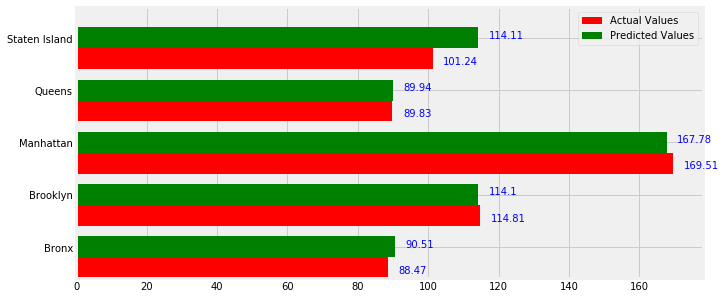

In [50]:
ind = np.arange(len(RF_visual))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, RF_visual['Actual Values'], width, color='red', label='Actual Values')
ax.barh(ind + width, RF_visual['Predicted Values'], width, color='green', label='Predicted Values')

ax.set(yticks=ind + width, yticklabels=RF_visual['Neighbourhood Group Cleansed'], ylim=[2*width - 1, len(RF_visual)])
ax.legend()


for i, v in enumerate(RF_visual['Predicted Values'].round(2)):
    ax.text(v + 3, i + .40, str(v), color='blue')
for i, v in enumerate(RF_visual['Actual Values'].round(2)):
    ax.text(v + 3, i - .10, str(v), color='blue')

fig.set_size_inches(10, 5)

plt.show()

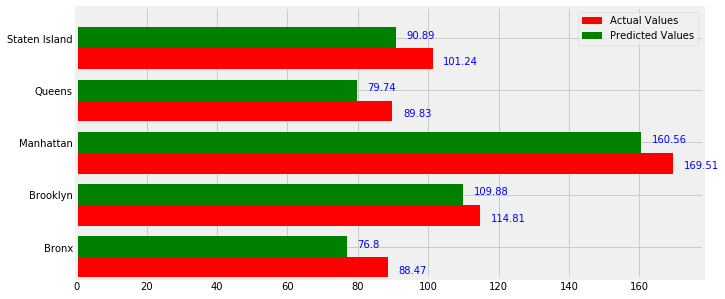

In [51]:
ind = np.arange(len(MLP_visual))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, MLP_visual['Actual Values'], width, color='red', label='Actual Values')
ax.barh(ind + width, MLP_visual['Predicted Values'], width, color='green', label='Predicted Values')

ax.set(yticks=ind + width, yticklabels=MLP_visual['Neighbourhood Group Cleansed'], ylim=[2*width - 1, len(MLP_visual)])
ax.legend()


for i, v in enumerate(MLP_visual['Predicted Values'].round(2)):
    ax.text(v + 3, i + .40, str(v), color='blue')
for i, v in enumerate(MLP_visual['Actual Values'].round(2)):
    ax.text(v + 3, i - .10, str(v), color='blue')

fig.set_size_inches(10, 5)

plt.show()